# Práctica 4 - Simulación de estrategias de Vacunación
## Introducción
La red de la figura representa una red de contactos sexuales de un grupo de personas. 

Se quiere reducir la transmisión de una enfermedad mediante vacunación. Suponer que cuando un individuo se vacuna, se impide cualquier contagio a través de sus relaciones directas. Así, definimos el **número de relaciones inmunizadas del nodo i** como el número de vecinos de i:

Suponer que se dispone de una sola vacuna, con la que se pretende maximizar el número de relaciones inmunizadas.

## Objetivo

Resolver las siguientes cuestiones:

1. Si se conoce a priori la red de contactos ¿a qué persona escogería? ¿por qué?

2. Suponer que desconoce la red de contactos. Sigue una estrategia de vacunación que llama aleatoria y que consiste en escoger un individuo al azar y vacunarlo. Programe un pequeño script en python que simule esta estrategia un número de T veces en la red de contactos propuesta y calcule el número de relaciones inmunizadas esperado:

3. Suponer que al igual que antes desconoce la red de contactos. Ahora sigue una estrategia de vacunación que llama aleatoria indirecta y que consiste en escoger a un individuo al azar y después vacunar a uno de sus vecinos también escogido aleatoriamente. Programe un pequeño script en python que simule esta estrategia un número de T veces en la red de contactos propuesta y calcule el número de relaciones inmunizadas esperado.

4. ¿Cuál de las dos estrategias parece ser mejor? ¿Por qué? 

5. Implemente una función en python que dada una red (por ejemplo la red de contactos propuesta inicialmente) calcule el valor esperado del número de relaciones inmunizadas esperadas para la vacunación aleatoria. Piense en la relación que existe entre la distribución del grado de los nodos y su valor medio con el número de relaciones inmunizadas esperado de la estrategia de vacunación aleatoria. Compare este valor con el obtenido mediante simulación.

6. Implemente una función en python que dada una red (por ejemplo la red de contactos propuesta inicialmente) calcule el valor esperado del número de relaciones inmunizadas para la vacunación aleatoria indirecta. Compare este valor con el obtenido mediante simulación.


In [23]:
#Imports necesarios
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

### Creación de la red

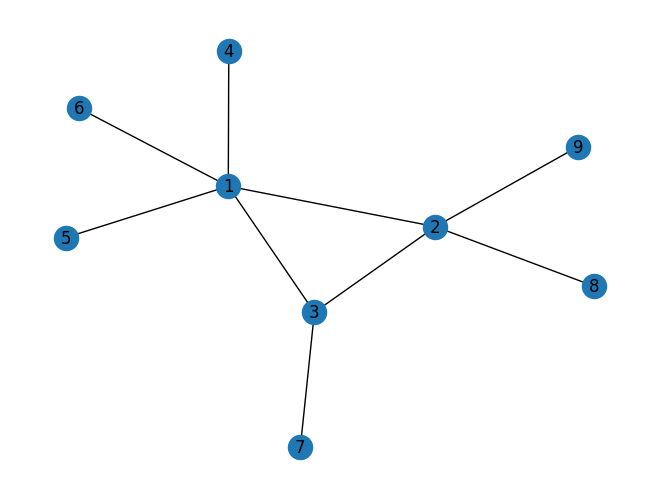

In [24]:
#Creamos la red
G = nx.Graph()

#Añadimos los nodos
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_node(5)
G.add_node(6)
G.add_node(7)
G.add_node(8)
G.add_node(9)

#Añadimos los enlaces
G.add_edge(1,6)
G.add_edge(1,5)
G.add_edge(1,4)
G.add_edge(1,2)
G.add_edge(1,3)
G.add_edge(2,3)
G.add_edge(2,8)
G.add_edge(2,9)
G.add_edge(3,7)

#Dibujamos la red
pos = nx.spring_layout(G)
nx.draw(G,pos, with_labels=True)
plt.show()


### Preguntas

1. Si se conoce a priori la red de contactos ¿a qué persona escogería? ¿Por qué?

    Escogería a la persona con mayor grado según el algoritmo de Erigenvector Centrality, porque como solo se dispone de una sola vacuna, el nodo más importante será aquel que tenga un mayor número de vínculos importantes.


2. Suponer que desconoce la red de contactos. Sigue una estrategia de vacunación que llama aleatoria y que consiste en escoger un individuo al azar y vacunarlo. Programe un pequeño script en python que simule esta estrategia un número de T veces en la red de contactos propuesta y calcule el número de relaciones inmunizadas esperado

In [25]:
#imports
import random

def estrategia_vacunacion_aleatoria(G,T):
    '''
    Esta funcion simula una estrategia de vacunacion aleatoria en una red G.
    '''
    sumGrados = 0
    grados = [grado for nodo, grado in G.degree()]
    listaGrado = sorted(grados)
    n_nodos = G.number_of_nodes()
    for i in range (T):
        sumGrados += listaGrado[random.randint(0,8)] #Se obtiene el grado de forma aleatoria
    
    relaciones_esperadas = sum(grado / n_nodos for grado in grados)
    media = sumGrados/T
    print("Se ha simulado la estrategia aleatoria", T, "veces y se ha obtenido una media de ", media, " relaciones inmunizadas")
    print("Se esperaban", relaciones_esperadas, "relaciones inmunizadas")
    

In [26]:
#Ejecutamos el script para la red propuesta un numero T de veces
T = 1000
relaciones_inmunizadas = estrategia_vacunacion_aleatoria(G,T)

Se ha simulado la estrategia aleatoria 1000 veces y se ha obtenido una media de  2.006  relaciones inmunizadas
Se esperaban 2.0 relaciones inmunizadas


3. Suponer que al igual que antes desconoce la red de contactos. Ahora sigue una estrategia de vacunación que llama aleatoria indirecta y que consiste en escoger a un individuo al azar y después vacunar a uno de sus vecinos también escogido aleatoriamente. Programe un pequeño script en python que simule esta estrategia un número de T veces en la red de contactos propuesta y calcule el número de relaciones inmunizadas esperado.

In [34]:
def estrategia_vacunacion_aleatoria_indirecta (G,T):
    sumGrados = 0
    # Crear una lista vacía para almacenar las listas de grados de vecinos
    grados_vecinos = []

    # Para cada nodo en la red
    for nodo in G.nodes():
        # Obtener los vecinos del nodo
        vecinos = G.neighbors(nodo)
        # Obtener los grados de los vecinos
        grados = [G.degree(vecino) for vecino in vecinos]
        # Añadir la lista de grados a la lista principal
        grados_vecinos.append(grados)

    for i in range (T):
        vecinos = grados_vecinos[random.randint(0,8)] #Se obtiene la lista de vecinos y sus grado de forma aleatoria
        sumGrados += vecinos[random.randint(0,len(vecinos)-1)]

    # Calcular el número de nodos
    num_nodos = G.number_of_nodes()

    #Cambiar lo de abajo, tiene que dar alrededor de 3.7
    # Calcular las relaciones esperadas
    relaciones_esperadas = sum(sum(grado / num_nodos for grado in vecinos_grados) for vecinos_grados in grados_vecinos)

    media=sumGrados/T
    print("Se ha simulado la estrategia aleatoria", T, "veces y se ha obtenido una media de ", media, " relaciones inmunizadas")
    print(f'Relaciones esperadas: {relaciones_esperadas}')


In [35]:
T=1000
estrategia_vacunacion_aleatoria_indirecta(G,T)

Se ha simulado la estrategia aleatoria 1000 veces y se ha obtenido una media de  3.754  relaciones inmunizadas
Relaciones esperadas: 6.222222222222222
